In [77]:
import pandas as pd
import numpy as np
import matplotlib as mt
from matplotlib import pyplot as plt
#import plotly as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

## Loading the data

In [122]:
data = pd.read_csv("Environment_Temperature_change_E_All_Data_NOFLAG.csv", encoding = 'latin1')
data.head(5)

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


## Data Preprocessing

Remove rows pertaining to standard deviation

In [123]:
data = data[data["Element Code"] < 7271]
data.head(2)

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597


Remove data on seasonal and meteorological year periodicity

In [124]:
data = data[data["Months Code"] < 7016]

Drop irrelevant columns

In [125]:
data.drop(columns=['Area Code', 'Months Code', 'Element Code','Element', 'Unit'], axis=1, inplace=True)
data.head(5)

,Area,Months,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
1,Afghanistan,January,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
3,Afghanistan,February,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
5,Afghanistan,March,1.512,1.512,1.512,1.512,1.512,1.512,1.512,1.512,...,1.512,1.512,1.512,1.512,1.512,1.512,1.512,1.512,1.512,1.512
7,Afghanistan,April,1.406,1.406,1.406,1.406,1.406,1.406,1.406,1.406,...,1.406,1.406,1.406,1.406,1.406,1.406,1.406,1.406,1.406,1.406
9,Afghanistan,May,1.230,1.230,1.230,1.230,1.230,1.230,1.230,1.230,...,1.230,1.230,1.230,1.230,1.230,1.230,1.230,1.230,1.230,1.230


Transform dataframe to have a column for year

In [126]:
data = data.melt(id_vars=['Area','Months'],var_name='Year', value_name='Temperature Change')
data["Year"] = data["Year"].apply(lambda x: x.lstrip("Y"))
data.head(5)

,Area,Months,Year,Temperature Change
0,Afghanistan,January,1961,1.950
1,Afghanistan,February,1961,2.597
2,Afghanistan,March,1961,1.512
3,Afghanistan,April,1961,1.406
4,Afghanistan,May,1961,1.230


## Data Analysis

Can we identify recurring seasonal patterns in temperature anomalies within the dataset, and if so, which countries show the most pronounced seasonal variations?

BY CONTINENT

Asia:
Minimum change: July - 0.187
Maximum change: February - 1.093
Africa:
Minimum change: June - 0.292
Maximum change: January - 0.488
Northern America:
Minimum change: July - 0.36600000000000005
Maximum change: February - 1.621
South America:
Minimum change: January - 0.263
Maximum change: June - 0.564
Antarctica:
Minimum change: February - 1.084
Maximum change: August - 2.216
Europe:
Minimum change: August - 0.411
Maximum change: January - 1.6859999999999997
Australia and New Zealand:
Minimum change: April - 0.467
Maximum change: October - 0.833


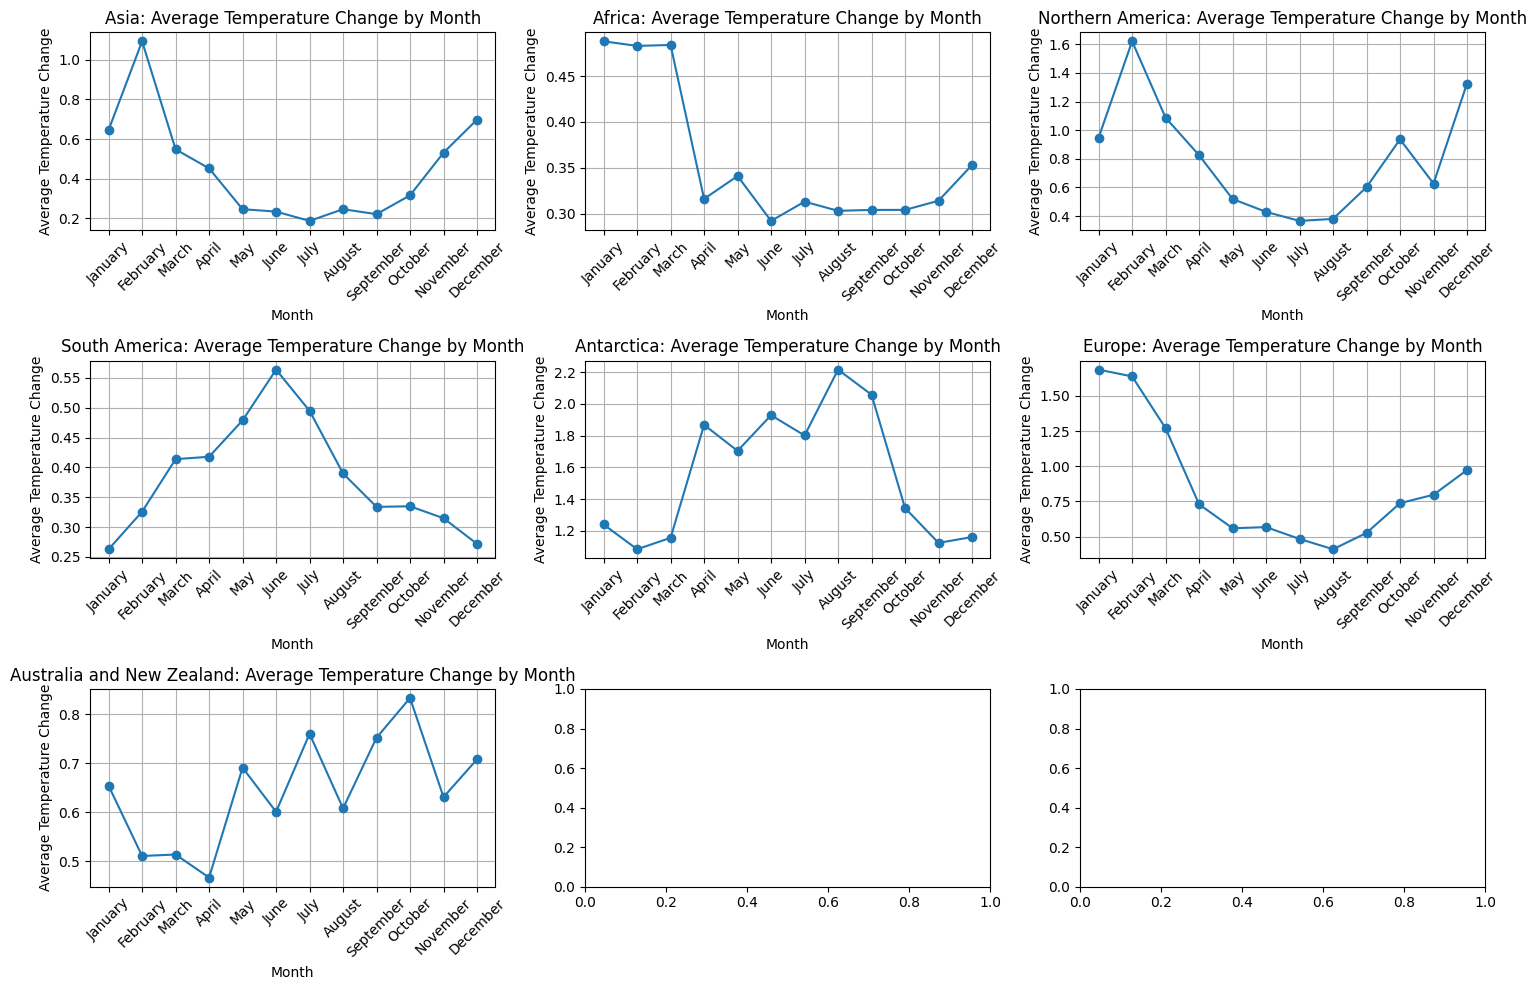

In [130]:
# Define continents
continents = ["Asia", "Africa", "Northern America", "South America", "Antarctica", "Europe", "Australia and New Zealand"]

# Create subplots
# Calculate number of rows and columns for subplots
num_rows = (len(continents) + 2) // 3  # Add 2 to ensure that we round up
num_cols = min(len(continents), 3)

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Iterate over continents
for i, continent in enumerate(continents):
    # Filter data for the continent
    # Calculate subplot index
    row_index = i // num_cols
    col_index = i % num_cols
    continent_data = data[(data["Area"] == continent)]
    
    # Calculate average temperature change by month
    monthly_avg = continent_data.groupby('Months', sort=False)['Temperature Change'].mean().reset_index()
    
    # Calculate minimum and maximum temperature changes
    min_index = monthly_avg['Temperature Change'].idxmin()
    max_index = monthly_avg['Temperature Change'].idxmax()
    min_change = monthly_avg.loc[min_index, 'Temperature Change']
    max_change = monthly_avg.loc[max_index, 'Temperature Change']
    min_month = monthly_avg.loc[min_index, 'Months']
    max_month = monthly_avg.loc[max_index, 'Months']
    
    print(continent + ":")
    print(f"Minimum change: {min_month} - {min_change}")
    print(f"Maximum change: {max_month} - {max_change}")

    # Plot on the corresponding subplot
    axs[row_index][col_index].plot(monthly_avg['Months'], monthly_avg['Temperature Change'], marker='o')
    axs[row_index][col_index].set_title(continent + ': Average Temperature Change by Month')
    axs[row_index][col_index].set_xlabel('Month')
    axs[row_index][col_index].set_ylabel('Average Temperature Change')
    axs[row_index][col_index].set_xticks(monthly_avg.index)
    axs[row_index][col_index].set_xticklabels(monthly_avg['Months'], rotation=45)
    axs[row_index][col_index].grid(True)

plt.tight_layout()
plt.show()


Do abrupt changes or shifts in temperature anomalies occur within certain countries or regions, and can we characterize these patterns?

In [133]:
from sklearn.ensemble import IsolationForest

In [138]:
data.groupby('Area')

In [139]:
# Outlier detection parameters
outliers_fraction = 0.05  # Fraction of outliers expected in the data

# Define outlier detection model (Isolation Forest)
model = IsolationForest(contamination=outliers_fraction)

# Group data by 'Area' (country or region) and apply outlier detection
outliers = {}
for area, group in data.groupby('Area'):
    # Extract temperature anomaly values for the area
    print(area)
    temperature_anomaly = group['Temperature Change'].values.reshape(-1, 1)
    
    # Fit the outlier detection model
    model.fit(temperature_anomaly)
    
    # Predict outliers
    is_outlier = model.predict(temperature_anomaly)
    
    # Add outliers to dictionary
    outliers[area] = group[is_outlier == -1]

# Visualize outliers
plt.figure(figsize=(10, 6))
for area, outlier_group in outliers.items():
    plt.scatter(outlier_group['Months'], outlier_group['Temperature Change'], label=area, marker='o')

plt.title('Outliers Detected by Isolation Forest')
plt.xlabel('Month')
plt.ylabel('Temperature Change')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

Afghanistan
Africa
Albania
Algeria
American Samoa


ValueError: Input X contains NaN.
IsolationForest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [136]:
temperature_anomaly = group['Temperature Change'].values.reshape(-1, 1)

Are there any constraints or rules that govern the relationship between temperature change and other environmental factors like land use or geographical features?